In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Sentiment Analysis w/ VADER

### Data Preprocessing

loading meta ads data

In [33]:
dff = pd.read_csv('ads_data_unfiltered_halfyear_01_2019_to_06_2024_v1.csv')

In [34]:
dff.columns

Index(['ad_creative_bodies', 'languages', 'ad_delivery_start_time',
       'impressions', 'id', 'impressions_upper'],
      dtype='object')

In [35]:
dff.drop(columns=['impressions', 'impressions_upper', 'id', 'languages'], inplace=True)

In [36]:
dff.isna().sum()

ad_creative_bodies        248
ad_delivery_start_time      0
dtype: int64

In [37]:
dff.dropna(subset=['ad_creative_bodies'], inplace=True)

In [38]:
dff['ad_creative_bodies'].value_counts()

ad_creative_bodies
["This content was removed because it didn't follow our Advertising Standards."]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [39]:
dff = dff[~dff['ad_creative_bodies'].str.contains("This content was removed because it didn't follow our Advertising Standards.", na=False)]

In [40]:
dff.isna().sum()

ad_creative_bodies        0
ad_delivery_start_time    0
dtype: int64

In [41]:
dff.shape

(8698, 2)

### VADER Anylizer

Version I

In [ ]:

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Convert 'ad_creative_bodies' column to strings
#ads_df['ad_creative_bodies'] = ads_df['ad_creative_bodies'].astype(str)

# Apply the function to the 'ad_creative_bodies' column
sentiment_scores = dff['ad_creative_bodies'].apply(get_sentiment_scores)

# Convert the sentiment scores to a DataFrame
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Concatenate the sentiment scores DataFrame with the original DataFrame
dff = pd.concat([dff, sentiment_df], axis=1)

# Display the updated DataFrame with sentiment scores
scrollable_div = f"""
<div style="height: 400px; overflow-y: scroll;">
    {dff.to_html(index=False)}
</div>
"""

display(HTML(scrollable_div))

Version II: cutting dff in two and analyze each part and see whether it works better

In [42]:
# Calculate the midpoint of the DataFrame
midpoint = len(dff) // 2 + len(dff) % 2

# Split the DataFrame into two halves
dff_half1 = dff.iloc[:midpoint].reset_index(drop=True)
dff_half2 = dff.iloc[midpoint:].reset_index(drop=True)

# dff_half1 and dff_half2 are now two separate DataFrames
print(dff_half1.shape, dff_half2.shape)

(4349, 2) (4349, 2)


1st half

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Convert 'ad_creative_bodies' column to strings
#ads_df['ad_creative_bodies'] = ads_df['ad_creative_bodies'].astype(str)

# Apply the function to the 'ad_creative_bodies' column
sentiment_scores = dff_half1['ad_creative_bodies'].apply(get_sentiment_scores)

# Convert the sentiment scores to a DataFrame
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Concatenate the sentiment scores DataFrame with the original DataFrame
dff_half1 = pd.concat([dff_half1, sentiment_df], axis=1)

# Display the updated DataFrame with sentiment scores
scrollable_div = f"""
<div style="height: 400px; overflow-y: scroll;">
    {dff_half1.to_html(index=False)}
</div>
"""

display(HTML(scrollable_div))

2nd half

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Convert 'ad_creative_bodies' column to strings
#ads_df['ad_creative_bodies'] = ads_df['ad_creative_bodies'].astype(str)

# Apply the function to the 'ad_creative_bodies' column
sentiment_scores = dff_half2['ad_creative_bodies'].apply(get_sentiment_scores)

# Convert the sentiment scores to a DataFrame
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Concatenate the sentiment scores DataFrame with the original DataFrame
dff_half2 = pd.concat([dff_half2, sentiment_df], axis=1)

# Display the updated DataFrame with sentiment scores
scrollable_div = f"""
<div style="height: 400px; overflow-y: scroll;">
    {dff_half2.to_html(index=False)}
</div>
"""

display(HTML(scrollable_div))

Concatenate them back together

In [45]:
# Concatenate the two halves back together
dff_recombined = pd.concat([dff_half1, dff_half2], ignore_index=True)

In [46]:
dff_recombined

ad_creative_bodies  \
0     ['"No matter how much you think you\'ve built ...   
1     ['MUST WATCH! Charlie Kirk Spent 2018 Challeng...   
2     ['"What is money?" In my new documentary, "In ...   
3     ["The US needs to shrink its military budget. ...   
4     ['Professor Levinson asserts: "Legal scholars ...   
...                                                 ...   
8693  ["I'd be honored to be your voice in Okanogan ...   
8694  ['In any given political party’s nomination pr...   
8695  ['Thank you for your support, Thad! Solar powe...   
8696  ['Democrats are furious as Trump supporters li...   
8697  ["Biden doesn't even know what he stands for #...   

     ad_delivery_start_time    neg    neu    pos  compound  
0                2019-01-01  0.000  0.952  0.048    0.0258  
1                2019-01-01  0.000  0.790  0.210    0.4559  
2                2019-01-01  0.000  0.837  0.163    0.5106  
3                2019-01-01  0.015  0.935  0.050    0.6375  
4                2019-01-01  0.047  0.823  0.130    0.9835  
...                     ...    ...    ...    ...       ...  
8693             2024-05-30  0.000  0.703  0.297    0.5859  
8694             2024-06-01  0.108  0.747  0.144    0.9665  
8695             2024-05-31  0.000  0.583  0.417    0.9117  
8696             2024-05-27  0.162  0.568  0.271    0.3612  
8697             2024-05-30  0.000  1.000  0.000    0.0000  

[8698 rows x 6 columns]

### Checking for missing dates

In [48]:
# Ensure the 'ad_delivery_start_time' column is in datetime format
dff_recombined['ad_delivery_start_time'] = pd.to_datetime(dff_recombined['ad_delivery_start_time'])

# Define the full date range from the minimum to the maximum date
full_date_range = pd.date_range(start="2019-01-01", end="2024-05-30", freq='D')

# Identify the unique dates in the 'ad_delivery_start_time' column
existing_dates = dff_recombined['ad_delivery_start_time'].dt.date.unique()

# Find missing dates by comparing the full range to the existing dates
missing_dates = sorted(set(full_date_range.date) - set(existing_dates))

# Output missing dates
print("Missing Dates:", missing_dates)


Missing Dates: [datetime.date(2019, 1, 12), datetime.date(2019, 1, 15), datetime.date(2019, 2, 2), datetime.date(2019, 2, 11), datetime.date(2019, 2, 18), datetime.date(2019, 3, 10), datetime.date(2019, 3, 13), datetime.date(2019, 3, 31), datetime.date(2019, 4, 6), datetime.date(2019, 4, 27), datetime.date(2019, 4, 29), datetime.date(2019, 5, 4), datetime.date(2019, 5, 6), datetime.date(2019, 5, 8), datetime.date(2019, 6, 7), datetime.date(2019, 6, 8), datetime.date(2019, 6, 14), datetime.date(2019, 6, 15), datetime.date(2019, 6, 23), datetime.date(2019, 7, 5), datetime.date(2019, 7, 7), datetime.date(2019, 7, 13), datetime.date(2019, 7, 14), datetime.date(2019, 7, 16), datetime.date(2019, 7, 30), datetime.date(2019, 8, 10), datetime.date(2019, 8, 14), datetime.date(2019, 8, 18), datetime.date(2019, 8, 26), datetime.date(2019, 9, 7), datetime.date(2019, 9, 13), datetime.date(2019, 9, 17), datetime.date(2019, 9, 21), datetime.date(2019, 9, 22), datetime.date(2019, 9, 29), datetime.date(

In [55]:
len(missing_dates)

339

In [61]:
dff_recombined

ad_delivery_start_time    neg    neu    pos  compound
0                2019-01-01  0.000  0.952  0.048    0.0258
1                2019-01-01  0.000  0.790  0.210    0.4559
2                2019-01-01  0.000  0.837  0.163    0.5106
3                2019-01-01  0.015  0.935  0.050    0.6375
4                2019-01-01  0.047  0.823  0.130    0.9835
...                     ...    ...    ...    ...       ...
8693             2024-05-30  0.000  0.703  0.297    0.5859
8694             2024-06-01  0.108  0.747  0.144    0.9665
8695             2024-05-31  0.000  0.583  0.417    0.9117
8696             2024-05-27  0.162  0.568  0.271    0.3612
8697             2024-05-30  0.000  1.000  0.000    0.0000

[8698 rows x 5 columns]

In [62]:
# Ensure 'ad_delivery_start_time' is in date-only format
dff_recombined['ad_delivery_start_time'] = pd.to_datetime(dff_recombined['ad_delivery_start_time']).dt.date

# Group by the date and calculate the mean for sentiment columns
dff_unique_dates = dff_recombined.groupby('ad_delivery_start_time')[['neg', 'pos', 'neu', 'compound']].mean().reset_index()

# Display the resulting DataFrame
print(dff_unique_dates.head())


  ad_delivery_start_time       neg      pos       neu  compound
0             2019-01-01  0.007750  0.12775  0.864500  0.450700
1             2019-01-02  0.000000  0.06100  0.939000  0.077200
2             2019-01-03  0.049167  0.08100  0.869167  0.561050
3             2019-01-04  0.388000  0.00000  0.612000 -0.690800
4             2019-01-05  0.074667  0.09000  0.835333  0.317367


In [63]:
dff_unique_dates

ad_delivery_start_time       neg      pos       neu  compound
0                2019-01-01  0.007750  0.12775  0.864500  0.450700
1                2019-01-02  0.000000  0.06100  0.939000  0.077200
2                2019-01-03  0.049167  0.08100  0.869167  0.561050
3                2019-01-04  0.388000  0.00000  0.612000 -0.690800
4                2019-01-05  0.074667  0.09000  0.835333  0.317367
...                     ...       ...      ...       ...       ...
1635             2024-05-28  0.000000  0.00000  1.000000  0.000000
1636             2024-05-29  0.053000  0.29425  0.652750  0.514625
1637             2024-05-30  0.043875  0.14125  0.814875  0.320813
1638             2024-05-31  0.000000  0.41700  0.583000  0.911700
1639             2024-06-01  0.108000  0.14400  0.747000  0.966500

[1640 rows x 5 columns]

In [64]:
# Ensure 'ad_delivery_start_time' is in datetime format (date only)
dff_unique_dates['ad_delivery_start_time'] = pd.to_datetime(dff_unique_dates['ad_delivery_start_time'])

# Define the full date range from the start to the end of the desired range
full_date_range = pd.date_range(start="2019-01-01", end="2024-06-01", freq='D')
full_dates_df = pd.DataFrame(full_date_range, columns=['ad_delivery_start_time'])

# Merge the full date range with the original DataFrame to add any missing dates
dff_complete = pd.merge(full_dates_df, dff_unique_dates, on='ad_delivery_start_time', how='left')

# Fill in missing sentiment scores by forward-filling and backward-filling
dff_complete[['neg', 'pos', 'neu', 'compound']] = dff_complete[['neg', 'pos', 'neu', 'compound']].fillna(method='ffill').fillna(method='bfill')

# Display the completed DataFrame to verify
print(dff_complete.head())


  ad_delivery_start_time       neg      pos       neu  compound
0             2019-01-01  0.007750  0.12775  0.864500  0.450700
1             2019-01-02  0.000000  0.06100  0.939000  0.077200
2             2019-01-03  0.049167  0.08100  0.869167  0.561050
3             2019-01-04  0.388000  0.00000  0.612000 -0.690800
4             2019-01-05  0.074667  0.09000  0.835333  0.317367


/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_17997/2802142074.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dff_complete[['neg', 'pos', 'neu', 'compound']] = dff_complete[['neg', 'pos', 'neu', 'compound']].fillna(method='ffill').fillna(method='bfill')


In [65]:
dff_complete

ad_delivery_start_time       neg      pos       neu  compound
0                2019-01-01  0.007750  0.12775  0.864500  0.450700
1                2019-01-02  0.000000  0.06100  0.939000  0.077200
2                2019-01-03  0.049167  0.08100  0.869167  0.561050
3                2019-01-04  0.388000  0.00000  0.612000 -0.690800
4                2019-01-05  0.074667  0.09000  0.835333  0.317367
...                     ...       ...      ...       ...       ...
1974             2024-05-28  0.000000  0.00000  1.000000  0.000000
1975             2024-05-29  0.053000  0.29425  0.652750  0.514625
1976             2024-05-30  0.043875  0.14125  0.814875  0.320813
1977             2024-05-31  0.000000  0.41700  0.583000  0.911700
1978             2024-06-01  0.108000  0.14400  0.747000  0.966500

[1979 rows x 5 columns]

export as a new csv file

In [68]:
#dff_complete.to_csv('meta_ads_data_VADER_sentiment_scores.csv', index=False)

## Further Analysis

In [3]:
dff_complete = pd.read_csv('meta_ads_data_VADER_sentiment_scores.csv')

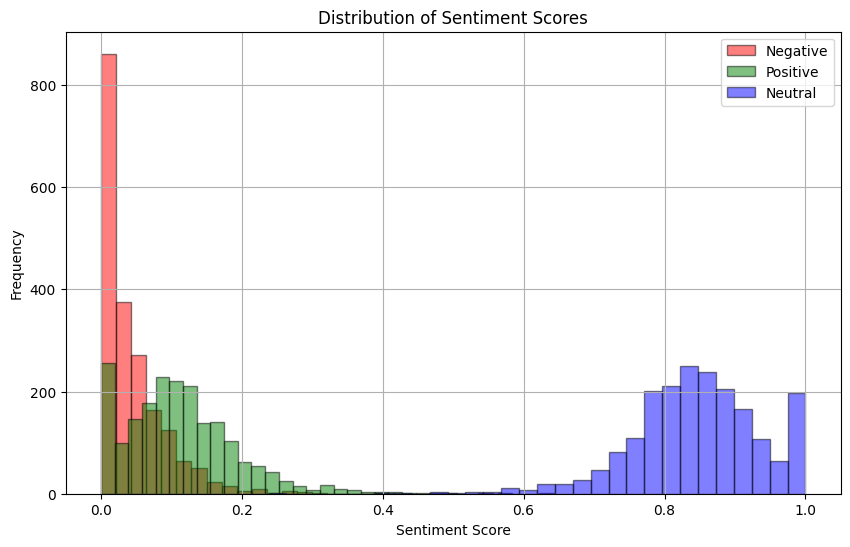

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dff_complete['neg'].dropna(), bins=30, edgecolor='k', alpha=0.5, color='red', label='Negative')
plt.hist(dff_complete['pos'].dropna(), bins=30, edgecolor='k', alpha=0.5, color='green', label='Positive')
plt.hist(dff_complete['neu'].dropna(), bins=30, edgecolor='k', alpha=0.5, color='blue', label='Neutral')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.savefig('sentiment_scores_distribution.pdf', format='pdf')
plt.show()


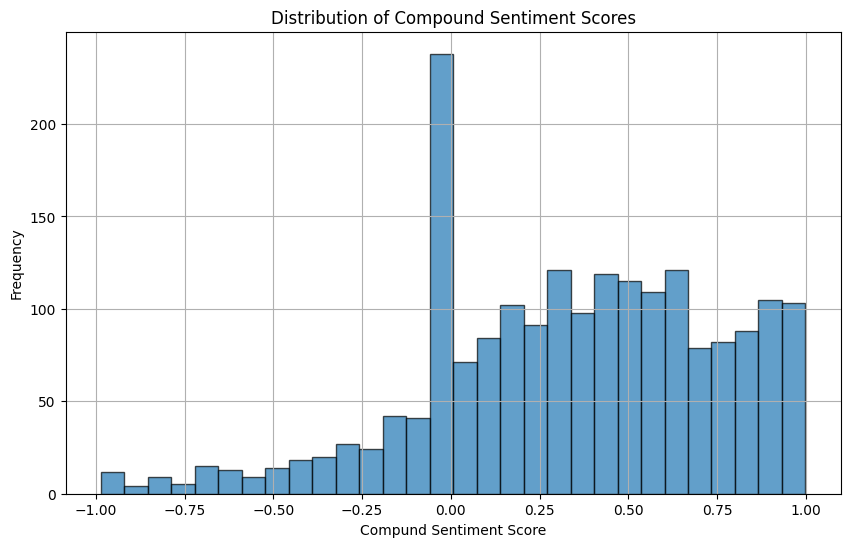

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dff_complete['compound'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compund Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()